## Feature Selection


### Univariate selection
- CHI squared Test

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import  chi2
from sklearn.feature_selection import   SelectKBest

In [43]:
data = pd.read_csv("train.csv")

In [44]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [45]:
X = data.drop("price_range",axis=1)
Y = pd.DataFrame(data["price_range"])
# **** OR ****
# X = data.iloc[:,0:20]
# Y = data.iloc[:,-1]

In [46]:
X.head()
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [47]:
# Apply selectKbest, select top 10 features
best_features = SelectKBest(score_func=chi2,k=10)

In [48]:
fit = best_features.fit(X,Y)

In [49]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [50]:
dfscores = pd.DataFrame(fit.scores_,columns=["Score"])
dfcolums = pd.DataFrame(X.columns,columns=["Features"])

In [51]:
# Visualise the relevance of features
features_score = pd.concat([dfcolums,dfscores],axis=1)

In [52]:
features_score.head()

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [79]:
TOP10 = features_score.sort_values(by="Score",ascending=False).head(n=10)['Features'].values

In [54]:
# Selecting Top 5-7 features

## Feature Importance

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier()
model.fit(X,Y)

<ipython-input-56-4b7331addcbe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


RandomForestClassifier()

In [57]:
# Tells the contribution to classification
model.feature_importances_

array([0.0732235 , 0.0060291 , 0.02724042, 0.00702238, 0.0252156 ,
       0.00676884, 0.0388925 , 0.02493111, 0.0394267 , 0.02292173,
       0.03078952, 0.05610136, 0.05641461, 0.47883513, 0.02812021,
       0.02821566, 0.0301429 , 0.00548085, 0.00691544, 0.00731245])

In [58]:
featureImportance = pd.DataFrame(model.feature_importances_,index=X.columns,columns=["Importance"])

In [59]:
featureImportance = featureImportance.sort_values(by="Importance",ascending=False)

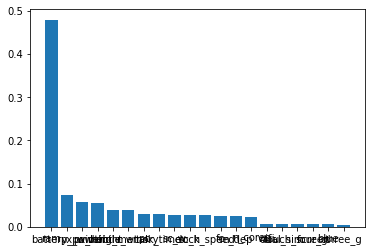

In [60]:
# Bar graph -->
plt.bar(featureImportance.index,featureImportance["Importance"])
plt.show()

## Correlation based methods

In [61]:
data_corr = data.corr()

In [62]:
data_corr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


In [70]:
# we have to find the features having high correlation with output that is price range
data_corr['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [66]:
import seaborn as sns


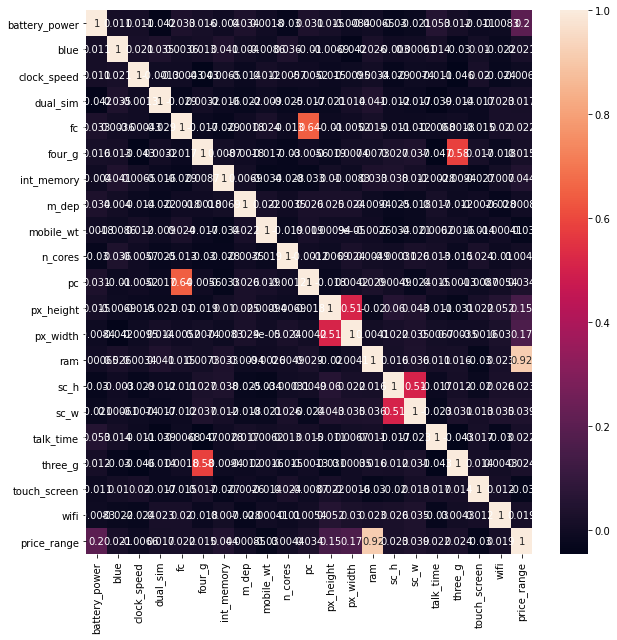

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True)
plt.show()

# Check Model performance

In [72]:
from sklearn.model_selection import cross_val_score

In [82]:
rfc = RandomForestClassifier(max_depth=10)

In [88]:
# Y = Y.values.reshape((-1,))
scores = cross_val_score(rfc,X,Y,cv=10)

In [89]:
scores


array([0.86 , 0.86 , 0.895, 0.855, 0.89 , 0.92 , 0.9  , 0.885, 0.845,
       0.855])

In [90]:
scores.mean()

0.8764999999999998

In [91]:
scores_1 =cross_val_score(rfc,X[TOP10],Y,cv=10)

In [92]:
scores_1.mean()

0.9050000000000002